In [73]:
from importlib import reload
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pipeline_v200
reload(pipeline_v200)
import qutip

sns.set_palette("Set2")
# sns.color_palette("Set2")

In [74]:
n = 7
N = 10
x_s = np.linspace(0, 10, num=100)
a_x= 3
delta = 0.1
derivative_delta = 1e-5
m = 6
DEBUG=True

# ket = qutip.rand_ket(2**n, distribution="haar").full().flatten()

y_s = np.array([pipeline_v200.simulation(
                        N=N,
                        n=n,
                        initial_state=None,
                        DEBUG=True,
                        derivative_delta=derivative_delta,
                        a_x= a_x, 
                        h_z= x, ## variable
                        delta = delta,
                        m = m) for x in x_s])

# just for plotting clarity
sparse_indices = np.array([i for i in list(range(len(x_s))) if i%10==0])

Generating random initial state
purity of initial state = (0.13207005670801517-1.8422966602781032e-19j) 
Dimension of the Hilbert space: 128
Initial state type: <class 'numpy.ndarray'> | initial_state: [[ 0.00654386+1.28203349e-20j  0.00082011+3.69584535e-03j
   0.00191331-1.65142955e-03j ... -0.00409103-2.88257466e-03j
  -0.00086562+3.95243652e-03j -0.00292782+7.94066089e-04j]
 [ 0.00082011-3.69584535e-03j  0.00615243+2.90290892e-20j
  -0.00078229-1.44272191e-03j ... -0.00292309+3.29409929e-03j
   0.00352458+8.87324367e-04j  0.00125143+1.57878044e-03j]
 [ 0.00191331+1.65142955e-03j -0.00078229+1.44272191e-03j
   0.00364132-3.72333481e-21j ... -0.00073216-1.62876472e-03j
  -0.00270177+1.47693735e-03j  0.00015633-3.35474791e-04j]
 ...
 [-0.00409103+2.88257466e-03j -0.00292309-3.29409929e-03j
  -0.00073216+1.62876472e-03j ...  0.00721172-1.07031068e-20j
  -0.00254594-4.15495239e-03j  0.00039503-2.08350001e-03j]
 [-0.00086562-3.95243652e-03j  0.00352458-8.87324367e-04j
  -0.00270177-1.476

In [75]:
y_s[0]

{'fidelity_truncated': 0.810585303094979,
 'fidelity_truncated_generalized': (0.9907465946905474+7.173264982725193e-19j),
 'lower_tqfi': (7.402724247562097-5.738611986180154e-16j),
 'upper_tqfi': 151.53175752401677,
 'fidelity_true': 0.98977480794221538553,
 'qfi_fidelity': 8.1801536462276899855,
 'sub_qfi_bound': 1.0517422319818335,
 'super_qfi_bound': 394.44509378587503,
 'trace_rho': (1.0000000000000018-1.23793865241216e-18j),
 'trace_rho_delta': (0.9999999999999996+3.872634634846661e-18j),
 'purity_rho': (0.13207005670801575-1.6943305923046176e-19j),
 'purity_rho_delta': (0.1320700567080152-4.171637265227429e-19j),
 'rank_rho': 8,
 'rank_rho_delta': 8,
 'truncated_eigenvalues': array([0.17914728, 0.15621798, 0.1344373 , 0.12867773, 0.11439777,
        0.10696065]),
 'eigenvalues': array([ 1.79147278e-01,  1.56217982e-01,  1.34437305e-01,  1.28677727e-01,
         1.14397772e-01,  1.06960646e-01,  9.96835115e-02,  8.04777801e-02,
         9.69263508e-17,  7.75721346e-17,  7.75338528

In [78]:
# pipelines return debug info only if we are in DEBUG==True
purity_rho = np.array([np.real(x["purity_rho"]) for x in y_s ])
purity_rho_delta = np.array([np.real(x["purity_rho_delta"]) for x in y_s ])
lower_tqfi = np.array([np.real(x["lower_tqfi"]) for x in y_s ])
upper_tqfi = np.array([np.real(x["upper_tqfi"]) for x in y_s ])
qfi_fidelity = np.array([np.real(x["qfi_fidelity"]) for x in y_s ])
true_fidelity = np.array([np.real(x["fidelity_true"]) for x in y_s ])
fidelity_truncated = np.array([np.real(x["fidelity_truncated"]) for x in y_s ])
fidelity_generalized = np.array([np.real(x["fidelity_truncated_generalized"]) for x in y_s ])

sub_qfi_bound = np.array([np.real(x["sub_qfi_bound"]) for x in y_s ])
super_qfi_bound = np.array([np.real(x["super_qfi_bound"]) for x in y_s ])
qfi_from_sld = np.array([np.real(x["QFI_from_SLD"]) for x in y_s ])

error = np.max([np.imag(x["lower_tqfi"]) for x in y_s ])
print(error)

9.739484796449316e-16


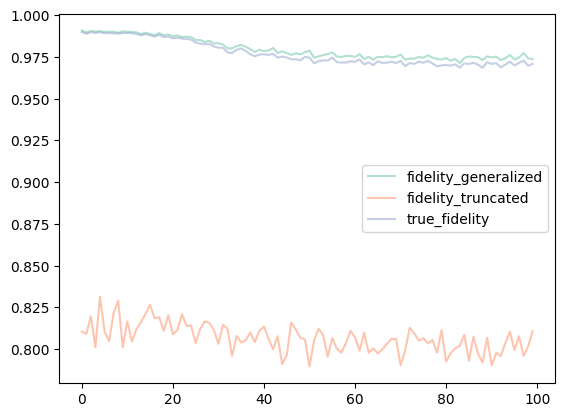

In [79]:
plt.plot(fidelity_generalized, label="fidelity_generalized", alpha=0.5)
plt.plot(fidelity_truncated, label="fidelity_truncated", alpha=0.5)
plt.plot(true_fidelity, label="true_fidelity", alpha=0.5)
plt.legend()

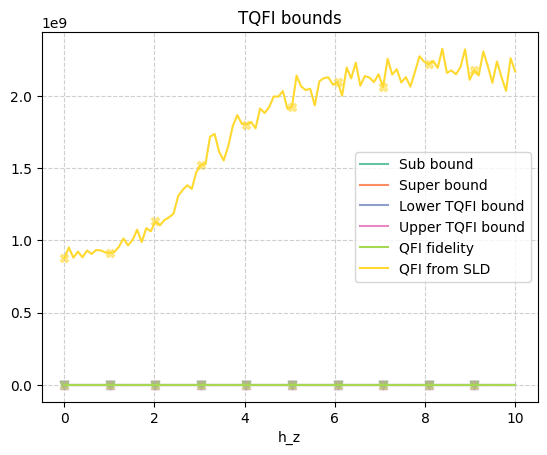

In [80]:
plt.scatter(x_s[sparse_indices], sub_qfi_bound[sparse_indices], marker="v", alpha=0.5)
plt.plot(x_s, sub_qfi_bound, label="Sub bound")
plt.scatter(x_s[sparse_indices], super_qfi_bound[sparse_indices], marker="v", alpha=0.5)
plt.plot(x_s, super_qfi_bound, label="Super bound")
plt.scatter(x_s[sparse_indices], lower_tqfi[sparse_indices], marker="v", alpha=0.5)
plt.plot(x_s, lower_tqfi, label="Lower TQFI bound")
plt.scatter(x_s[sparse_indices], (upper_tqfi[sparse_indices]), marker="^", alpha=0.5)
plt.plot(x_s, (upper_tqfi), label="Upper TQFI bound")
plt.scatter(x_s[sparse_indices], (qfi_fidelity[sparse_indices]), marker="X", alpha=0.5)
plt.plot(x_s, (qfi_fidelity), label="QFI fidelity")
plt.scatter(x_s[sparse_indices], (qfi_from_sld[sparse_indices]), marker="X", alpha=0.5)
plt.plot(x_s, (qfi_from_sld), label="QFI from SLD")
plt.title("TQFI bounds")
plt.grid(True, linestyle="--", alpha=0.6)  # Subtle grid for readability
plt.xlabel("h_z")
plt.legend()
plt.show()

In [81]:
print(f"max at h_z = {x_s[np.argmax(lower_tqfi)]}")

max at h_z = 8.383838383838384


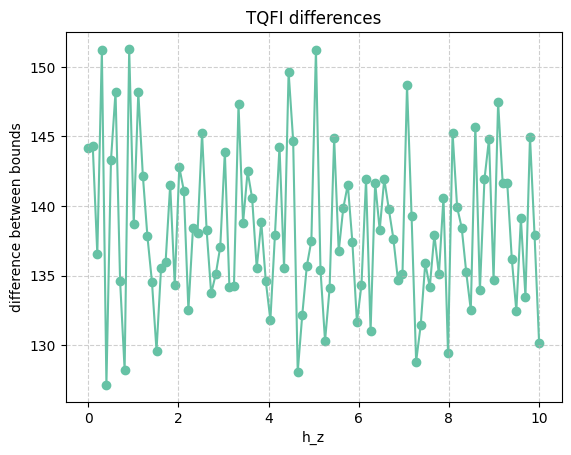

In [82]:
plt.scatter(x_s,upper_tqfi - lower_tqfi)
plt.plot(x_s,upper_tqfi - lower_tqfi)
plt.title("TQFI differences")
plt.ylabel("difference between bounds")
plt.grid(True, linestyle="--", alpha=0.6)  # Subtle grid for readability
plt.xlabel("h_z")
plt.show()

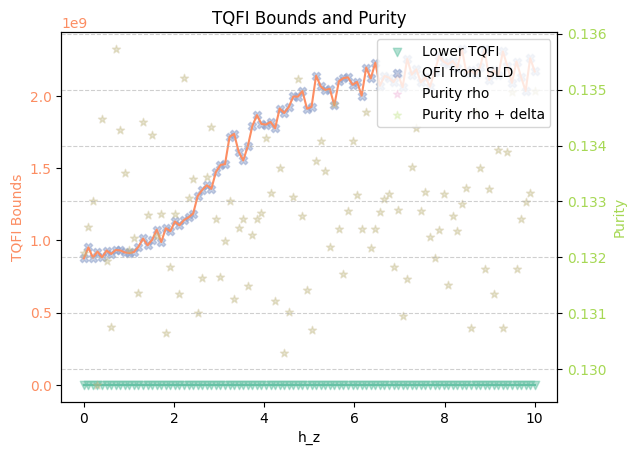

In [83]:
fig, ax1 = plt.subplots()

palette = sns.color_palette("Set2")
# First y-axis

#ax1.scatter(x_s, super_qfi_bound, marker="^", alpha=0.5, label="Super QFI bound", color =  palette[0])
#ax1.plot(x_s, super_qfi_bound)
#ax1.scatter(x_s, upper_tqfi, marker="^", alpha=0.5, label="Upper TQFI", color =  palette[1])
#ax1.plot(x_s, upper_tqfi)



ax1.scatter(x_s, lower_tqfi, alpha=0.5, marker="v", label="Lower TQFI", color = palette[0])
ax1.plot(x_s, lower_tqfi)


ax1.scatter(x_s, qfi_from_sld, marker= "X", alpha=0.5, label="QFI from SLD", color = palette[2])
ax1.plot(x_s, qfi_from_sld)

ax1.set_xlabel("h_z")
ax1.set_ylabel("TQFI Bounds", color= palette[1])
ax1.tick_params(axis='y', labelcolor= palette[1])

# Second y-axis
ax2 = ax1.twinx()
ax2.scatter(x_s, purity_rho, alpha=0.2, marker="*",label="Purity rho", 
            color= palette[3])
ax2.scatter(x_s, purity_rho_delta, alpha=0.2, marker="*", label="Purity rho + delta", color = palette[4])

ax2.set_ylabel("Purity", color=palette[4])
ax2.tick_params(axis='y', labelcolor=palette[4])

plt.grid(True, linestyle="--", alpha=0.6)  # Subtle grid for readability

# Legend
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

plt.title("TQFI Bounds and Purity")
plt.show()


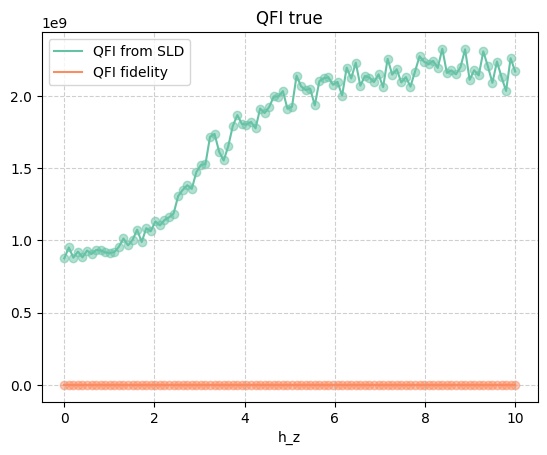

In [84]:
plt.scatter(x_s,qfi_from_sld, alpha=0.5)
plt.plot(x_s,qfi_from_sld, label="QFI from SLD")
plt.scatter(x_s,qfi_fidelity, alpha=0.5)
plt.plot(x_s,qfi_fidelity, label="QFI fidelity")
plt.xlabel("h_z")
plt.title("QFI true")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)  # Subtle grid for readability


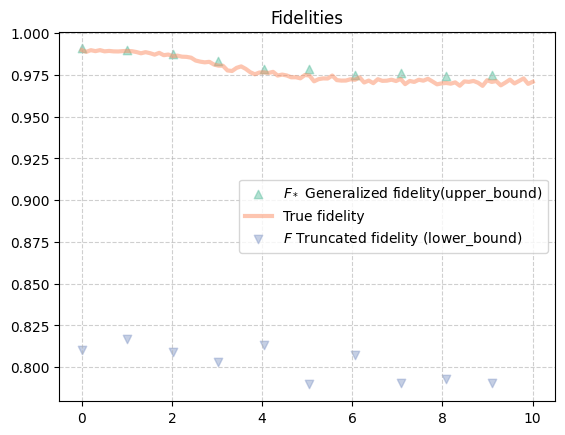

In [85]:
plt.scatter(x_s[sparse_indices], 
            fidelity_generalized[sparse_indices], 
            label="$F_*$ Generalized fidelity(upper_bound)", 
            alpha=0.5, marker="^", linewidth=1, color= palette[0])

plt.plot(x_s, true_fidelity, label="True fidelity", alpha=0.5, linewidth=3, color=palette[1])

plt.scatter(x_s[sparse_indices], fidelity_truncated[sparse_indices],
             label="$F$ Truncated fidelity (lower_bound)", 
             alpha=0.5,marker="v", 
             linewidth=1, color=palette[2])
plt.legend()
plt.title("Fidelities")
plt.grid(True, linestyle="--", alpha=0.6)  # Subtle grid for readability

In [86]:
all(true_fidelity <=  fidelity_generalized) & \
all(true_fidelity >= fidelity_truncated)

True

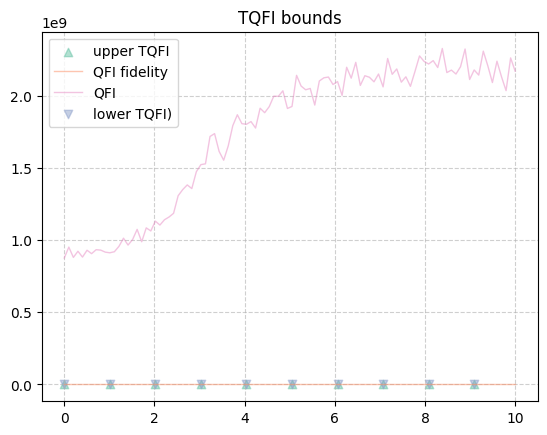

In [87]:
plt.scatter(x_s[sparse_indices], 
            upper_tqfi[sparse_indices], 
            label="upper TQFI", 
            alpha=0.5, marker="^", linewidth=1, color= palette[0])

plt.plot(x_s, qfi_fidelity, label="QFI fidelity", alpha=0.5, linewidth=1, color=palette[1])
plt.plot(x_s, qfi_from_sld, label="QFI", alpha=0.5, linewidth=1, color=palette[3])

plt.scatter(x_s[sparse_indices], 
            lower_tqfi[sparse_indices],
             label="lower TQFI)", 
             alpha=0.5,marker="v", 
             linewidth=1, color=palette[2])
plt.legend()
plt.title("TQFI bounds")
plt.grid(True, linestyle="--", alpha=0.6)  # Subtle grid for readability

In [88]:
all(lower_tqfi <= qfi_from_sld) & \
all(qfi_from_sld <= upper_tqfi)

False

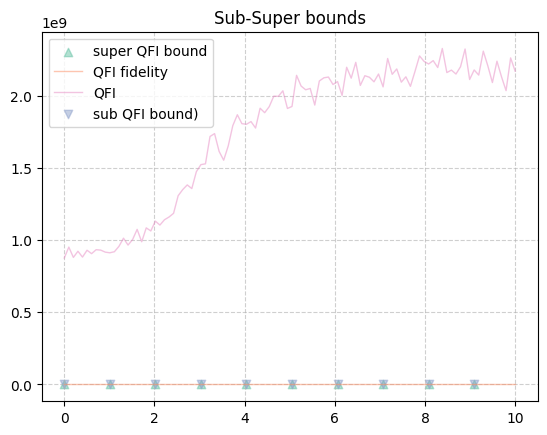

In [89]:
plt.scatter(x_s[sparse_indices], 
            super_qfi_bound[sparse_indices], 
            label="super QFI bound", 
            alpha=0.5, marker="^", linewidth=1, color= palette[0])

plt.plot(x_s, qfi_fidelity, label="QFI fidelity", alpha=0.5, linewidth=1, color=palette[1])
plt.plot(x_s, qfi_from_sld, label="QFI", alpha=0.5, linewidth=1, color=palette[3])

plt.scatter(x_s[sparse_indices], 
            sub_qfi_bound[sparse_indices],
             label="sub QFI bound)", 
             alpha=0.5,marker="v", 
             linewidth=1, color=palette[2])
plt.legend()
plt.title("Sub-Super bounds")
plt.grid(True, linestyle="--", alpha=0.6)  # Subtle grid for readability

In [90]:
all(super_qfi_bound >= qfi_from_sld)
all(qfi_from_sld >= sub_qfi_bound)

True

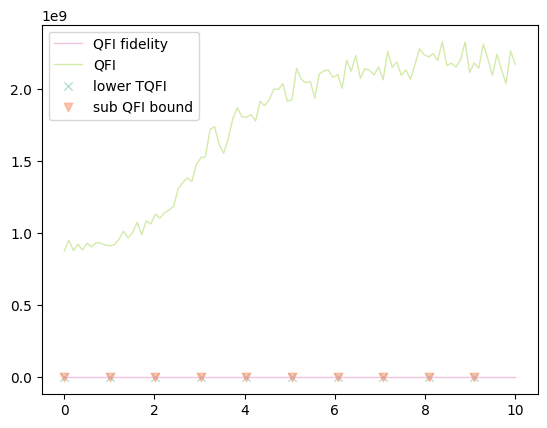

In [91]:
plt.plot(x_s, qfi_fidelity, label="QFI fidelity", alpha=0.5, linewidth=1, color=palette[3])
plt.plot(x_s, qfi_from_sld, label="QFI", alpha=0.5, linewidth=1, color=palette[4])

plt.scatter(x_s[sparse_indices], 
            lower_tqfi[sparse_indices],
             label="lower TQFI", 
             alpha=0.5,marker="x", 
             linewidth=1, color=palette[0])

plt.scatter(x_s[sparse_indices], 
            sub_qfi_bound[sparse_indices], 
            label="sub QFI bound", 
            alpha=0.5, marker="v", linewidth=1, color= palette[1])

plt.legend()

In [92]:
all(sub_qfi_bound <= lower_tqfi)

True

True


Text(0.5, 1.0, 'Super QFI - TQFI')

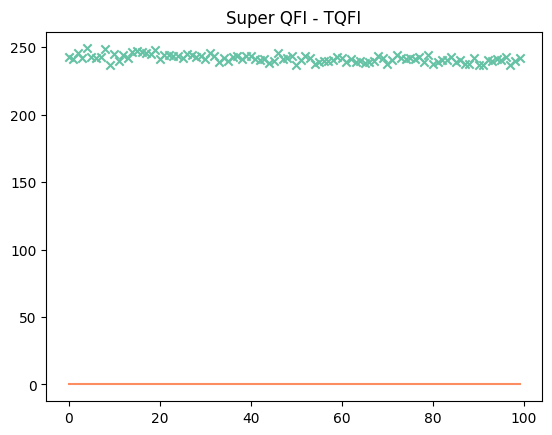

In [93]:
print(any(sub_qfi_bound <= lower_tqfi))
plt.scatter(x = list(range(len(lower_tqfi))), y = super_qfi_bound - upper_tqfi, marker="x")
plt.plot([0]*len(lower_tqfi), color=palette[1])
plt.title("Super QFI - TQFI")


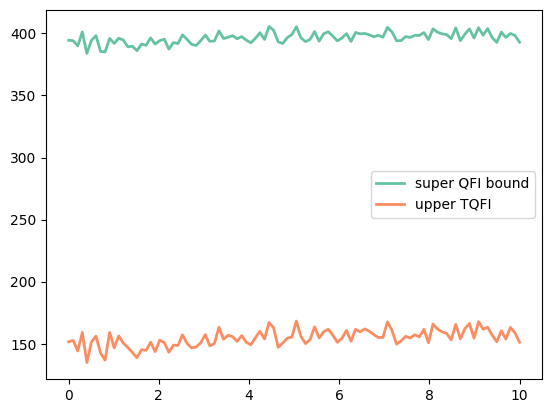

In [94]:
a = 0
b = len(x_s)
segment = range(a,b)
plt.plot(x_s[segment], 
            super_qfi_bound[segment], 
            label="super QFI bound", 
            alpha=1, linewidth=2, color= palette[0])
plt.plot(x_s[segment], 
            upper_tqfi[segment],
             label="upper TQFI", 
             alpha=1,
             linewidth=2, color=palette[1])
plt.legend()

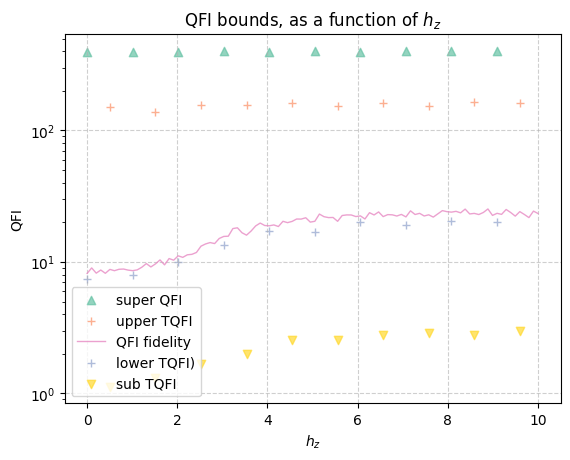

In [99]:
# shift some indices just gor clarity
sparse_indices_1 = (np.array(sparse_indices) + 5)[(np.array(sparse_indices) + 5 ) < len(x_s)]

plt.scatter(x_s[sparse_indices], 
            super_qfi_bound[sparse_indices], 
            label="super QFI", 
            alpha=0.7, marker="^", linewidth=1, color= palette[0])

#plt.plot(x_s,super_qfi_bound, alpha=0.7, linewidth=1, color= palette[0])

plt.scatter(x_s[sparse_indices_1], 
            upper_tqfi[sparse_indices_1],
             label="upper TQFI", 
             alpha=0.7,marker="+", 
             linewidth=1, color=palette[1])

plt.plot(x_s, qfi_fidelity, label="QFI fidelity", alpha=0.8, linewidth=1, color=palette[3])
#plt.plot(x_s, qfi_from_sld, label="QFI", alpha=0.5, linewidth=1, color=palette[4])

plt.scatter(x_s[sparse_indices], 
            lower_tqfi[sparse_indices],
             label="lower TQFI)", 
             alpha=0.7,marker="+", 
             linewidth=1, color=palette[2])
 
plt.scatter(x_s[sparse_indices_1], 
            sub_qfi_bound[sparse_indices_1],
             label="sub TQFI", 
             alpha=0.7,marker="v", 
             linewidth=1, color=palette[5])
             
plt.yscale("log")
plt.ylabel("QFI")
plt.xlabel("$h_z$")
plt.legend()
plt.title("QFI bounds, as a function of $h_z$")

plt.grid(True, linestyle="--", alpha=0.6)  # Subtle grid for readability